## <font color="red"> Relational Learning using the ILP system Aleph

In this coursework, we are exploring the ideas of Inductive Logic Programming and the aleph algorithm. ILP learns theories in the form of Horn logic programs using background knowledge (B_0.pl) and a set of positive and negative examples(.f and .n files). 

#### <font color="black"> Loading Heart dataset

In [1]:
import csv
file=open("heart.csv")
csv_reader=csv.reader(file)
csv_reader

In [2]:
header=[]
header=next(csv_reader)
print(header)

['ï»¿age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


#### <font color="black"> Extracting predicates and its arguments for background knowledge

In [3]:
for count,row in enumerate(csv_reader):
    string_1="has_age(id_"+str(count)+","+str(row[0])+")."
    print(string_1)
    if str(row[1])=="1":
        string_2="has_sex(id_"+str(count)+",male)."
        print(string_2)
    elif str(row[1])=="0":  
        string_2="has_sex(id_"+str(count)+",female)."
        print(string_2)
    if str(row[2])=="0":
        string_3="has_cp(id_"+str(count)+",typical angina)."
        print(string_3)
    elif str(row[2])=="1":  
        string_3="has_cp(id_"+str(count)+",atypical angina)."
        print(string_3)
    elif str(row[2])=="2":  
        string_3="has_cp(id_"+str(count)+",non-anginal pain)."
        print(string_3)
    elif str(row[2])=="3":  
        string_3="has_cp(id_"+str(count)+",asymptomatic)."
        print(string_3)
    string_4="has_trestbps(id_"+str(count)+","+str(row[3])+")."
    print(string_4)
    string_5="has_chol(id_"+str(count)+","+str(row[4])+")."
    print(string_5)
    if str(row[5])=="1":
        string_6="has_fbs(id_"+str(count)+",true)."
        print(string_6)
    elif str(row[5])=="0":  
        string_6="has_fbs(id_"+str(count)+",false)."
        print(string_6)
    if str(row[6])=="0":
        string_7="has_restecg(id_"+str(count)+",normal)."
        print(string_7)
    elif str(row[6])=="1":  
        string_7="has_restecg(id_"+str(count)+",wave abnormality)."
        print(string_7)
    elif str(row[6])=="2":  
        string_7="has_restecg(id_"+str(count)+",LVH)."
        print(string_7)
    string_8="has_thalach(id_"+str(count)+","+str(row[7])+")."
    print(string_8)
    if str(row[8])=="0":
        string_9="has_exang(id_"+str(count)+",no)."
        print(string_9)
    elif str(row[8])=="1":  
        string_9="has_exang(id_"+str(count)+",yes)."
        print(string_9)
    string_10="has_oldpeak(id_"+str(count)+","+str(row[9])+")."
    print(string_10)
    if str(row[10])=="0":
        string_11="has_slope(id_"+str(count)+",upsloping)."
        print(string_11)
    elif str(row[10])=="1":  
        string_11="has_slope(id_"+str(count)+",flat)."
        print(string_11)
    elif str(row[10])=="2":  
        string_11="has_slope(id_"+str(count)+",downsloping)."
        print(string_11)
    string_12="has_ca(id_"+str(count)+","+str(row[11])+")."
    print(string_12)
    if str(row[12])=="0":
        string_13="has_thal(id_"+str(count)+",error)."
        print(string_13)
    elif str(row[12])=="1":  
        string_13="has_thal(id_"+str(count)+",fixed defect)."
        print(string_13)
    elif str(row[12])=="2":  
        string_13="has_thal(id_"+str(count)+",normal)."
        print(string_13)
    elif str(row[12])=="3":  
        string_13="has_thal(id_"+str(count)+",reversable defect)."
        print(string_13) 
    if str(row[13])=="0":
        string_14="has_target(id_"+str(count)+",no_disease)."
        print(string_14)
    elif str(row[13])=="1":  
        string_14="has_target(id_"+str(count)+",disease)."
        print(string_14)    

has_age(id_0,63).
has_sex(id_0,male).
has_cp(id_0,asymptomatic).
has_trestbps(id_0,145).
has_chol(id_0,233).
has_fbs(id_0,true).
has_restecg(id_0,normal).
has_thalach(id_0,150).
has_exang(id_0,no).
has_oldpeak(id_0,2.3).
has_slope(id_0,upsloping).
has_ca(id_0,0).
has_thal(id_0,fixed defect).
has_target(id_0,disease).
has_age(id_1,37).
has_sex(id_1,male).
has_cp(id_1,non-anginal pain).
has_trestbps(id_1,130).
has_chol(id_1,250).
has_fbs(id_1,false).
has_restecg(id_1,wave abnormality).
has_thalach(id_1,187).
has_exang(id_1,no).
has_oldpeak(id_1,3.5).
has_slope(id_1,upsloping).
has_ca(id_1,0).
has_thal(id_1,normal).
has_target(id_1,disease).
has_age(id_2,41).
has_sex(id_2,female).
has_cp(id_2,atypical angina).
has_trestbps(id_2,130).
has_chol(id_2,204).
has_fbs(id_2,false).
has_restecg(id_2,normal).
has_thalach(id_2,172).
has_exang(id_2,no).
has_oldpeak(id_2,1.4).
has_slope(id_2,downsloping).
has_ca(id_2,0).
has_thal(id_2,normal).
has_target(id_2,disease).
has_age(id_3,56).
has_sex(id_3,m

#### <font color="black"> Importing Library Files

May need to restart the kernel before running the below codes.

In [1]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
import os
import collections
import pickle
from pyswip import Prolog, Variable, Functor
from utils import *



****************** Rule sets generated by Aleph for the Heart Dataset using BK:   B0
['is_heart_patient(id_21)', 'is_heart_patient(id_22)', 'is_heart_patient(id_23)', 'is_heart_patient(A) :-   has_cp(A,B)', 'is_heart_patient(id_25)', 'is_heart_patient(id_26)', 'is_heart_patient(id_27)', 'is_heart_patient(id_28)', 'is_heart_patient(id_29)', 'is_heart_patient(id_30)', 'is_heart_patient(id_31)', 'is_heart_patient(id_32)', 'is_heart_patient(id_33)', 'is_heart_patient(id_35)', 'is_heart_patient(id_36)', 'is_heart_patient(id_37)', 'is_heart_patient(id_38)', 'is_heart_patient(id_39)', 'is_heart_patient(id_40)', 'is_heart_patient(id_41)', 'is_heart_patient(id_42)', 'is_heart_patient(id_43)', 'is_heart_patient(id_44)', 'is_heart_patient(id_45)', 'is_heart_patient(id_46)', 'is_heart_patient(id_47)', 'is_heart_patient(id_48)', 'is_heart_patient(id_49)', 'is_heart_patient(id_50)', 'is_heart_patient(id_51)', 'is_heart_patient(id_52)', 'is_heart_patient(id_53)', 'is_heart_patient(id_54)', 'is_hear

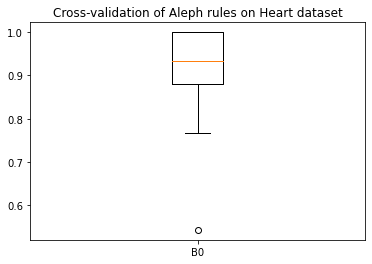

In [2]:
models = []
BK_0="B_0.pl"
models.append(('ILP',"B0", BK_0))
results1 = []
names1 = []
avg_time = []
for name, label, model in models:
    print("\n")
    print("****************** Rule sets generated by Aleph for the Heart Dataset using BK:  ", label)
    if name=="ILP":
        #print(model)
        cv_results, time_learn= aleph_cross_val_score_1(model, cv=10, scoring='accuracy') #  10 fold cross validation
        print(cv_results)
    else:
        kfold = StratifiedKFold(n_splits=10, random_state=1)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results1.append(cv_results)
    avg_time.append(time_learn)
    names1.append(label)
    print("\n")
    print('\t Average Accuracy of %s is  %f with std of %f' % (label, cv_results.mean(), cv_results.std()))
    print("\n")
pyplot.boxplot(results1, labels=names1)
pyplot.title('Cross-validation of Aleph rules on Heart dataset')
pyplot.show()


Noisy data affects the aleph algorithm to generate rules correctly. Need to improve the background knowledge to generate accurate rules, however the accuracy of B0 is 0.896929.